# Lead Scoring Case Study

By Siddhesh K & Varshitha M


<b>Our Goal</b>
- X Education has a conversion rate of approx 30%
- CEO wants conversion rate to be as ambitious as 80%
- Target variable is ‘Converted’ where 1 = converted & 0 = not converted
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', True)

In [4]:
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

In [5]:
df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [6]:
df.info()
#checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
df.describe()
#checking the statistical information

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


we can infer that outliers are present mostly in  'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit'as we see there is a lot of difference between the mean and the 50%

In [8]:
for column in df.columns:
    print(df[column].value_counts())
    print('**********************************************************************')


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**********************************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
**********************************************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*******************************

Too many Redundant Columns

In [9]:
#dropping the redundant columns
df = df.drop(['Receive More Updates About Our Courses',
             'Search','Update me on Supply Chain Content',
              'Get updates on DM Content','X Education Forums',
              'Newspaper','Digital Advertisement','Get updates on DM Content',
              'Through Recommendations','Newspaper Article',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [11]:
#dealing with select column
select = []
for i in df.columns:
    if len(df[i].isin(['Select']).unique())>1:
        select.append(i)
        
print(select) 


['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# now replacing 'Select' category with null values

for i in select:
    df[i] = df[i].replace('Select',np.NaN)

df[['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai


In [13]:
for i in select:
    print(i, "=> "  ,df[i].unique())

Specialization =>  [nan 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
How did you hear about X Education =>  [nan 'Word Of Mouth' 'Other' 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
Lead Profile =>  [nan 'Potential Lead' 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool']
City =>  [nan 'Mumbai' 'Thane & Outskirts' 'Other Metro Cities' 'Other Cities'
 'Other Cities of Maharashtra' 'Tier II Cities']


##### Specialisation

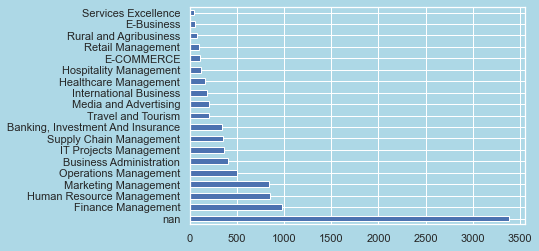

In [14]:
df.Specialization.value_counts(dropna = False).plot.barh()
plt.show()

In [15]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'No Specialization')

In [16]:
df['Specialization'].unique()

array(['No Specialization', 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Finance Management',
       'Travel and Tourism', 'Human Resource Management',
       'Marketing Management', 'Banking, Investment And Insurance',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'Services Excellence',
       'Hospitality Management', 'Rural and Agribusiness',
       'Healthcare Management', 'E-Business'], dtype=object)

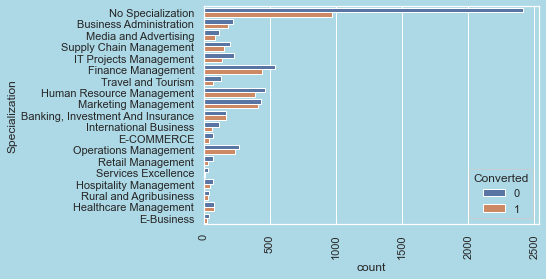

In [17]:
sns.countplot(y=df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [18]:
df['Specialization'] = df['Specialization'].replace(['Supply Chain Management',
       'IT Projects Management', 'Finance Management','Human Resource Management',
       'Marketing Management','Operations Management','Retail Management','Hospitality Management',
                            'Healthcare Management'],'Specializations in Management')

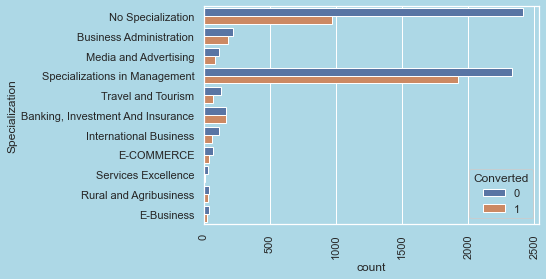

In [19]:
sns.countplot(y=df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

##### How did you hear about X Education

In [20]:
df['How did you hear about X Education'].value_counts(dropna = False).plot.barh
plt.show()

In [21]:
df.drop(['How did you hear about X Education'],axis = 1, inplace = True)

##### Lead Profile

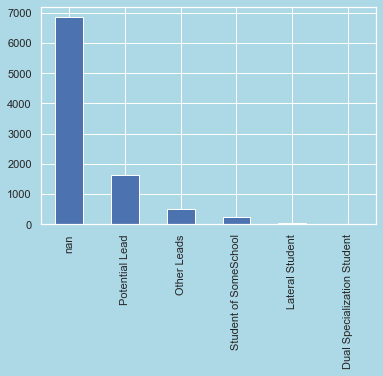

In [22]:
df['Lead Profile'].value_counts(dropna = False).plot.bar()
plt.show()

In [23]:
df.drop(['Lead Profile'],axis = 1, inplace = True)

##### City

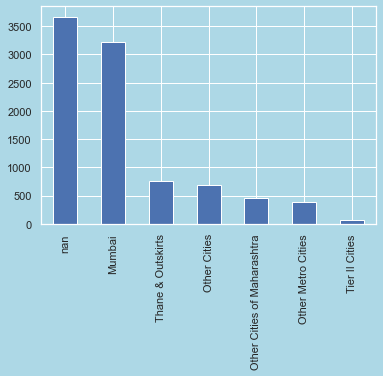

In [24]:
df['City'].value_counts(dropna = False).plot.bar()
plt.show()

In [25]:
df['City']=df['City'].fillna('Mumbai')

In [26]:
print(df.shape)
df.isnull().sum()

(9240, 22)


Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
City                                                0
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score 

In [27]:
# Drop all the columns in which greater than 4000 missing values are present

for col in df.columns:
    if df[col].isnull().sum() > 4000:
        df.drop(col, 1, inplace=True)

In [28]:
print(df.shape)
df.isnull().sum()

(9240, 17)


Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
City                                                0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [29]:
df[['What matters most to you in choosing a course']].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects                          6528
NaN                                              2709
Flexibility & Convenience                           2
Other                                               1
dtype: int64

In [30]:
df = df.drop('What matters most to you in choosing a course', axis=1)

In [31]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Sure we can group others as non indian but it will still be heavily skewed in Indias favour

In [32]:
# So we drop it
df = df.drop('Country', axis=1)

In [33]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
df['What is your current occupation'].fillna('Unemployed', inplace = True)

In [35]:
print(df.shape)
df.isnull().sum()

(9240, 15)


Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                               0
What is your current occupation              0
Tags                                      3353
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [36]:
df['Lead Source'] = df['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
df['Lead Source'] = df['Lead Source'].replace('google','Google')

print(df['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', df['Lead Source'].isna().sum())

#we are going to replace these labels (Facebook, bing, Click2call, Live Chat,Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, NC_EDM) in one label as 'Others'.

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


In [37]:
# imputing missing values to max occuring label i.e. Google

df['Lead Source'] = df['Lead Source'].replace(np.NaN,'Google')

print(df['Lead Source'].value_counts())
print('************')
print('Missing values count -', df['Lead Source'].isna().sum())


Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
************
Missing values count - 0


In [38]:
print(df.shape)
df.isnull().sum()

(9240, 15)


Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                               0
What is your current occupation              0
Tags                                      3353
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [39]:
df['Tags'].value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

In [41]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Not Specified',
       'Lost to EINS', 'In confusion whether part time or DLP', 'Busy',
       'switched off', 'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [42]:
df['Tags'] = df['Tags'].replace([], 'OtherTags')

In [43]:
df['Tags'] = df['Tags'].replace(['Recognition issue (DEC approval)',
                                       'University not recognized',
                                       'Shall take in the next coming month',
                                       'Lateral student',
                                       'Interested in Next batch',
                                       'In confusion whether part time or DLP',
                                       'Want to take admission but has financial problems',
                                       'Still Thinking', 'Lost to Others',
                                       'in touch with EINS',
                                       'Lost to Others',
                                       'Shall take in the next coming month',
                                       'Lateral student','Interested in Next batch',
                                        'number not provided',
                                       'opp hangup','wrong number given',
                                       'Diploma holder (Not Eligible)',
                                       'invalid number','Graduation in progress',
                                       'Interested  in full time MBA',
                                       'Not doing further education',
                                       'switched off','Busy',
                                       'Lost to EINS'], 'Other_Tags')

In [44]:
df['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [45]:
print(df.shape)
df.isnull().sum()

(9240, 15)


Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [46]:
100*(float(137+103)/(df.shape[0]))
# 2% weight to this information

2.5974025974025974

In [47]:
df = df[~pd.isnull(df['TotalVisits'])]
print(df.shape)
df.isnull().sum()

(9103, 15)


Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

One Last Check to see whats inside out columns

In [48]:
for i in df.columns:
    print(df[i].unique())

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Other'
 'Reference']
['No' 'Yes']
['No' 'Yes']
[0 1]
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55. 141.
  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
[   0  674 1532 ...  603  483  927]
[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.    2.25
  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75  2.8
  2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25  6.71
  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6   2.9
  1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21 12.33
  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.    3.75


In [49]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [50]:
df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [51]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced',
                                                                  'Unreachable',
                                                                  'Unsubscribed',
                                                                   'Had a Phone Conversation',
                                                                   'Approached upfront',
                                                                   'Resubscribed to emails',
                                                                   'View in browser link Clicked',
                                                                   'Form Submitted on Website',
                                                                   'Email Received',
                                                                   'Email Marked Spam'
                                                                  ],'OthersLNA')

In [52]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [54]:
df['Last Activity'] = df['Last Activity'].replace([ 'Visited Booth in Tradeshow',
                                                                   'Approached upfront',
                                                                   'Resubscribed to emails',
                                                                   'Email Received',
                                                                   'Email Marked Spam',
                                                                   'Unsubscribed',
                                                                   'Had a Phone Conversation',
                                                                   'View in browser link Clicked',
                                                                   'Email Bounced',
                                                                   'Unreachable'                                                                   
                                                                  ],'OthersLA')

#### 1's and 0's


In [55]:
yes_no = ['Do Not Call','Do Not Email','A free copy of Mastering The Interview']


# creating dictionary for two categories where; Yes : 1 , No : 0

category={"No":0,"Yes":1}    

for i in yes_no:
    df[i]=df[i].map(category)


df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,No Specialization,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,No Specialization,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,OthersLA,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,No Specialization,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [56]:
for i in yes_no:
    print(df[i].value_counts())
    print("-------------------")

0    9101
1       2
Name: Do Not Call, dtype: int64
-------------------
0    8379
1     724
Name: Do Not Email, dtype: int64
-------------------
0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64
-------------------


In [57]:
df = df.drop('Do Not Call', axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

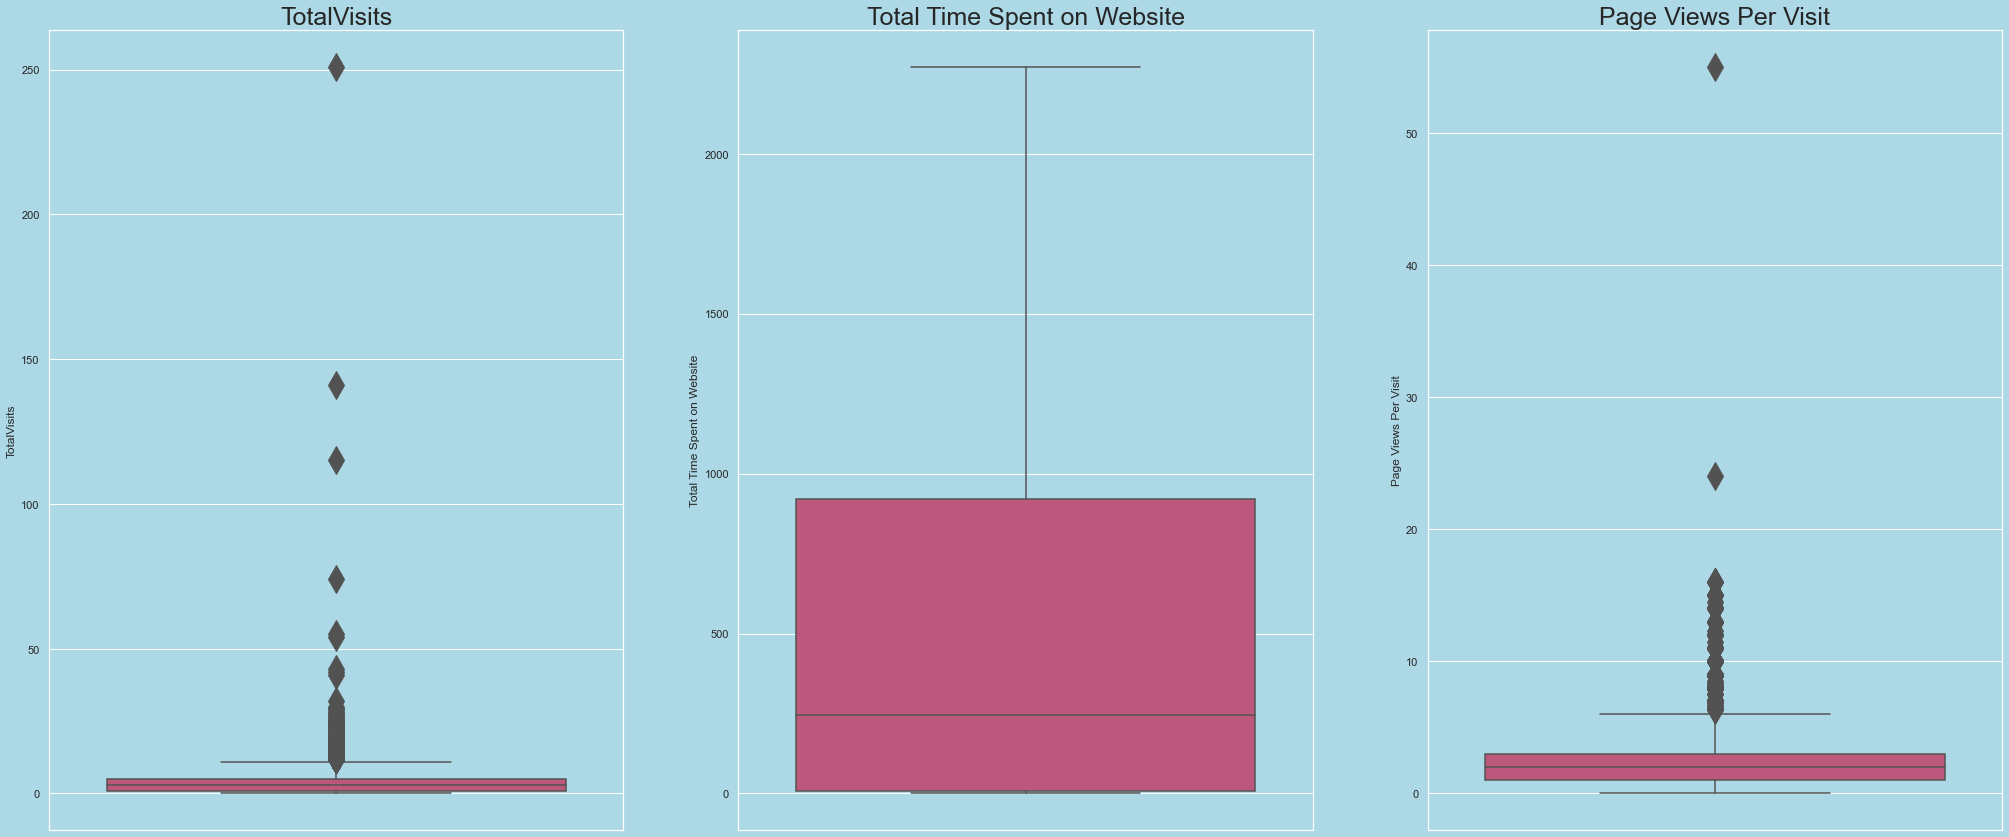

In [59]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

column_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(column_title[i],fontsize=25)
    sns.boxplot(y=df[column_title[i]],data=df,palette='plasma',fliersize=20)

In [60]:
# Let us limit all 3 
numerical_c = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

Outlier treatment necessary only for 'TotalVisits' & 'Page Views Per Visit'

In [61]:
for i in numerical_c:
    print(i,sep="\n")
    print(df[i].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
    print("\n","---------------------")

TotalVisits
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

 ---------------------
Total Time Spent on Website
count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

 ---------------------
Page Views Per Visit
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

 ------

In [62]:
lim1 = df['TotalVisits'].quantile(0.90)
df = df[df['TotalVisits'] <= lim1]

In [63]:
lim3 = df['Total Time Spent on Website'].quantile(0.99)
df = df[df['Total Time Spent on Website'] <= lim3]

In [64]:
lim2 = df['Page Views Per Visit'].quantile(0.90)
df = df[df['Page Views Per Visit'] <= lim2]

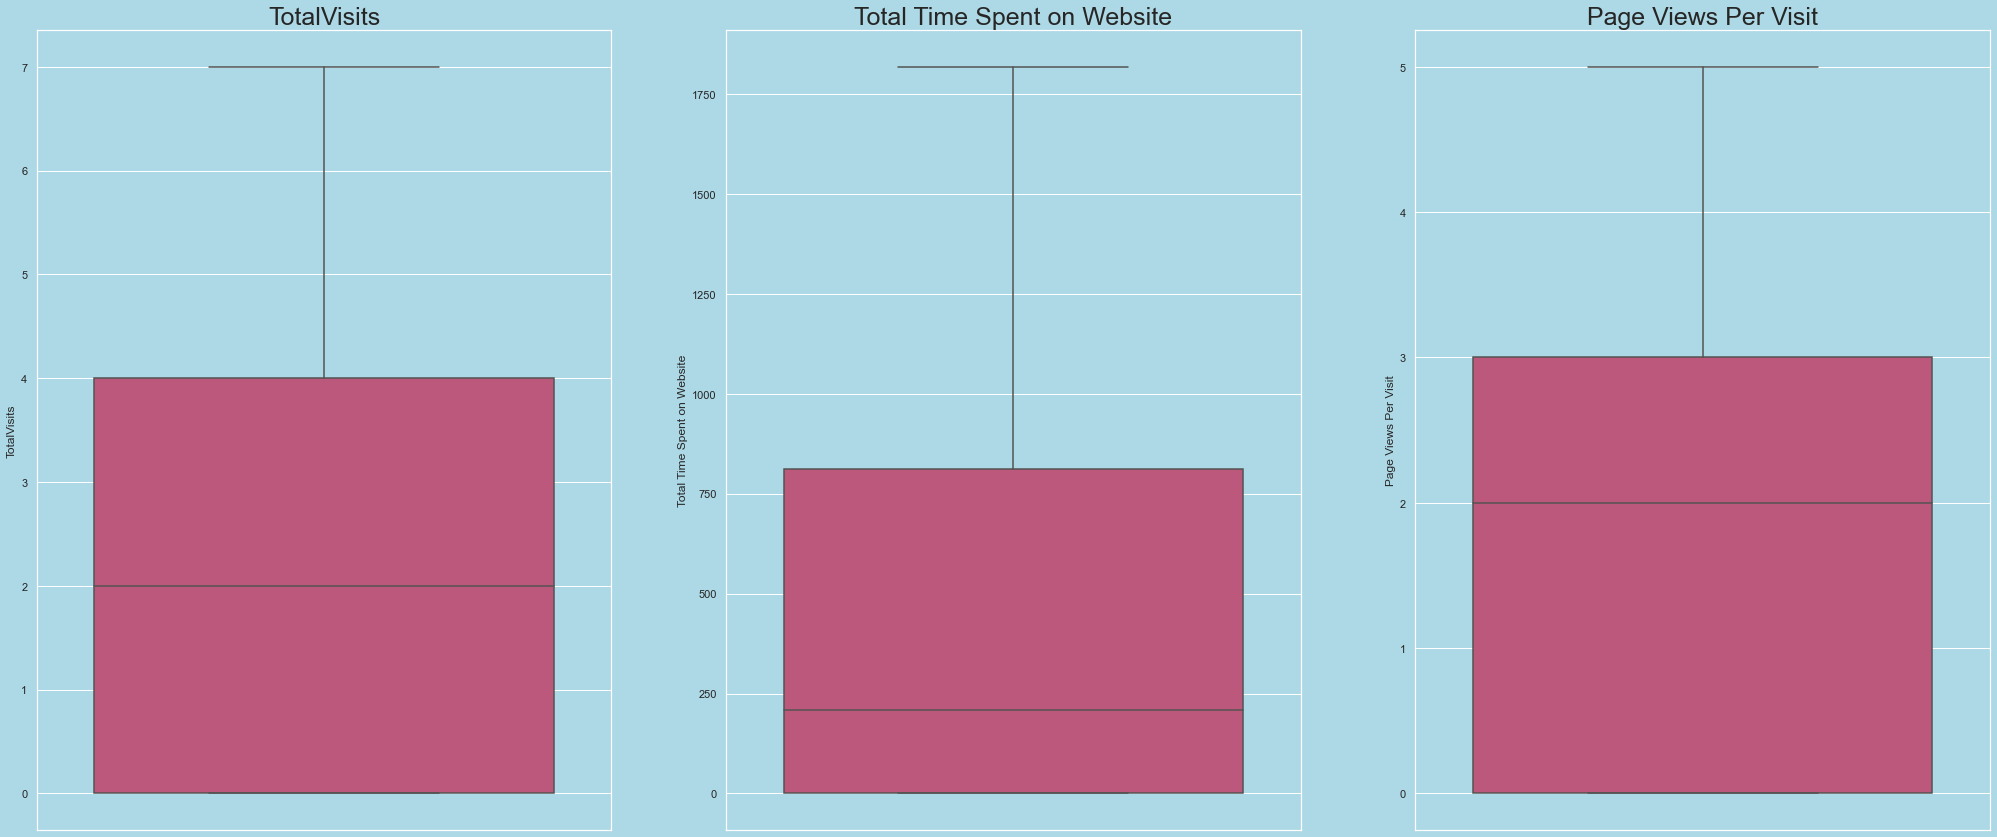

In [65]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

column_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(column_title[i],fontsize=25)
    sns.boxplot(y=df[column_title[i]],data=df,palette='plasma',fliersize=20)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7815 non-null   object 
 1   Lead Source                             7815 non-null   object 
 2   Do Not Email                            7815 non-null   int64  
 3   Converted                               7815 non-null   int64  
 4   TotalVisits                             7815 non-null   float64
 5   Total Time Spent on Website             7815 non-null   int64  
 6   Page Views Per Visit                    7815 non-null   float64
 7   Last Activity                           7815 non-null   object 
 8   Specialization                          7815 non-null   object 
 9   What is your current occupation         7815 non-null   object 
 10  Tags                                    7815 non-null   obje

### EDA

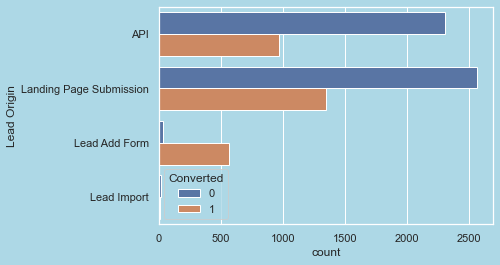

In [67]:
sns.countplot(y="Lead Origin", hue = "Converted",data = df)
plt.show()

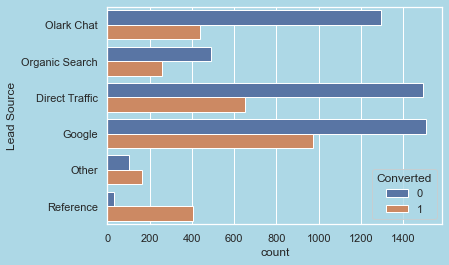

In [68]:
sns.countplot(y="Lead Source", hue = "Converted",data = df)
plt.show()

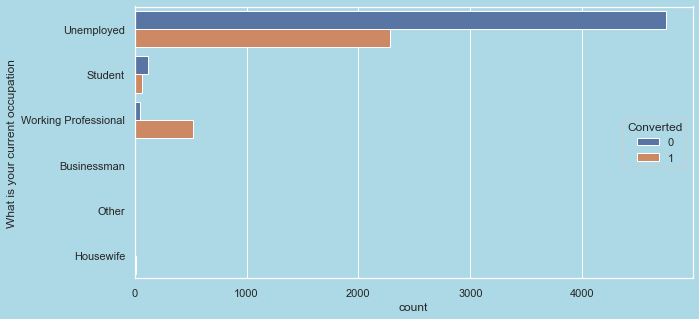

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=df)
plt.show()

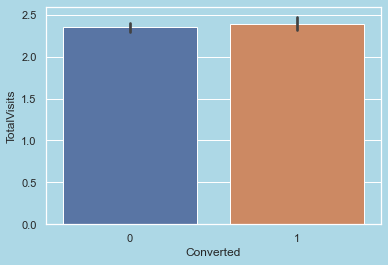

In [70]:
sns.barplot(x = 'Converted', y = 'TotalVisits', data = df)
plt.show()

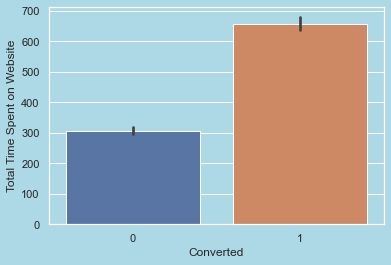

In [71]:
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = df)
plt.show()

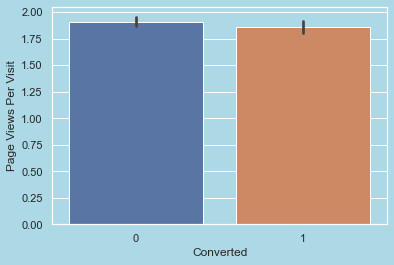

In [72]:
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = df)
plt.show()

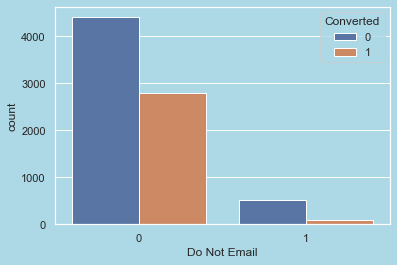

In [73]:
sns.countplot(x="Do Not Email", hue="Converted", data=df)
plt.show()

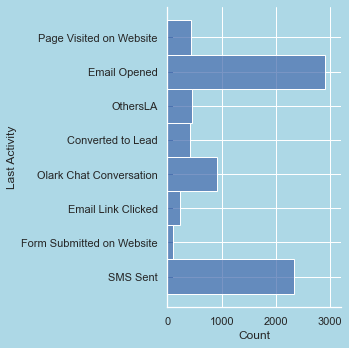

In [74]:
ax = sns.displot(y = df['Last Activity'],rug = True,bins = 500)
plt.show()

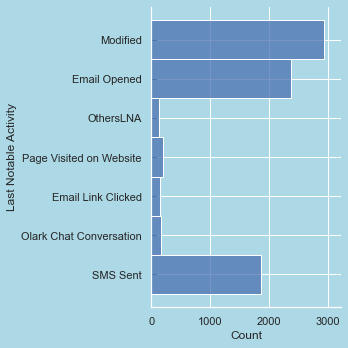

In [75]:
ax = sns.displot(y = df['Last Notable Activity'],rug = True,bins = 500)
plt.show()

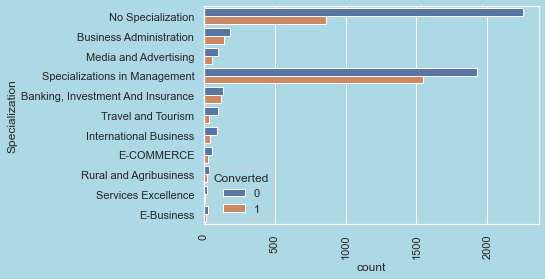

In [76]:
sns.countplot(y=df.Specialization, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

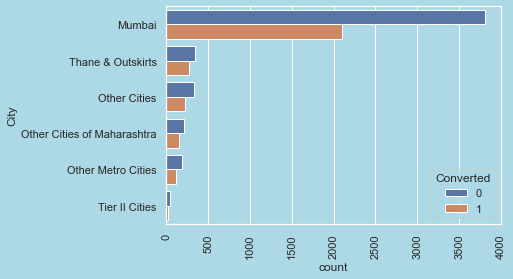

In [77]:
sns.countplot(y=df.City, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

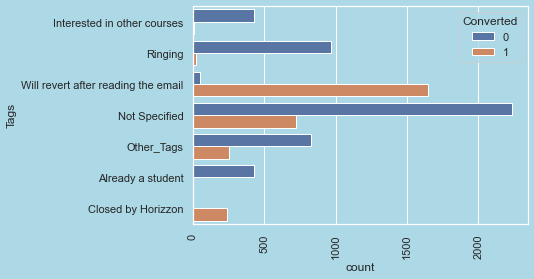

In [78]:
sns.countplot(y=df.Tags, hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

In [79]:
### Bivariate Analysis

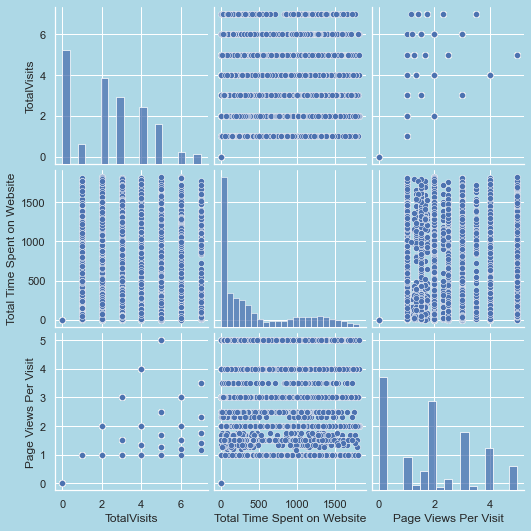

In [80]:
sns.pairplot(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

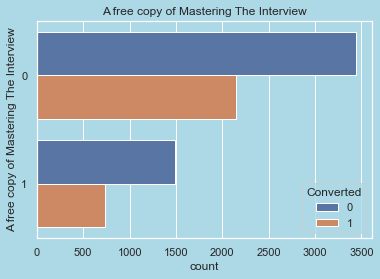

In [81]:
sns.countplot(y='A free copy of Mastering The Interview', hue='Converted', data=df)
plt.title('A free copy of Mastering The Interview')
plt.show()

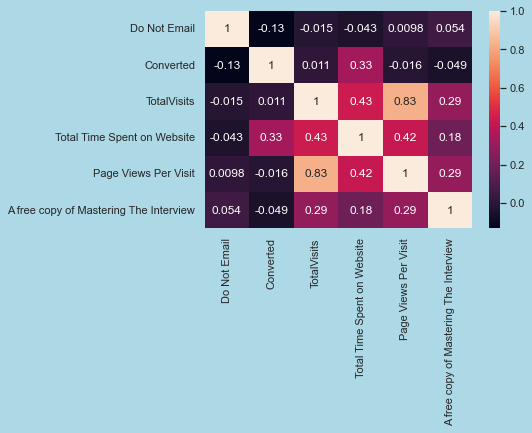

In [82]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### Dummy Variable Creation

In [83]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummies= pd.get_dummies(df[['Lead Origin',
                              'What is your current occupation',
                              'City']], drop_first=True)

df=pd.concat([df,dummies],1)

In [84]:
# 1.Specialization
# Creating dummy variables for the variable Specialization
dummy=pd.get_dummies(df['Specialization'],prefix='Specialization')
# Dropping Specialization_Not Specified
dummy=dummy.drop(['Specialization_No Specialization'],1)
# #Adding the results to the master dataframe
df=pd.concat([df,dummy],axis=1)


In [85]:
# Creating dummy variables for the variable Lead Source
dummy=pd.get_dummies(df['Lead Source'],prefix='Lead Source')
# Dropping Lead Source_Others
dummy=dummy.drop(['Lead Source_Other'],1)
#Adding the results to the master dataframe
df=pd.concat([df,dummy],axis=1)

In [86]:
# Creating dummy variables for the variable Lead Source
dummy=pd.get_dummies(df['Tags'],prefix='Tags')
# Dropping Lead Source_Others
dummy=dummy.drop(['Tags_Not Specified'],1)
#Adding the results to the master dataframe
df=pd.concat([df,dummy],axis=1)

In [87]:
# Creating dummy variables for the variable Last Activity
dummy=pd.get_dummies(df['Last Activity'],prefix='Last Activity')
# Dropping Last Activity_Others
dummy=dummy.drop(['Last Activity_OthersLA'],1)
#Adding the results to the master dataframe
df=pd.concat([df,dummy], axis = 1)

In [88]:
# Creating dummy variables for the variable Last Notable Activity
dummy=pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity')
# Dropping Last Notable Activity
dummy=dummy.drop(['Last Notable Activity_OthersLNA'],1)
#Adding the results to the master dataframe
df=pd.concat([df,dummy],axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           7815 non-null   object 
 1   Lead Source                                           7815 non-null   object 
 2   Do Not Email                                          7815 non-null   int64  
 3   Converted                                             7815 non-null   int64  
 4   TotalVisits                                           7815 non-null   float64
 5   Total Time Spent on Website                           7815 non-null   int64  
 6   Page Views Per Visit                                  7815 non-null   float64
 7   Last Activity                                         7815 non-null   object 
 8   Specialization                                        7815

Drop Original Categorical Columns

In [90]:
dupe_dums=df.select_dtypes(include=['object']).columns

df=df.drop(dupe_dums,axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          7815 non-null   int64  
 1   Converted                                             7815 non-null   int64  
 2   TotalVisits                                           7815 non-null   float64
 3   Total Time Spent on Website                           7815 non-null   int64  
 4   Page Views Per Visit                                  7815 non-null   float64
 5   A free copy of Mastering The Interview                7815 non-null   int64  
 6   Lead Origin_Landing Page Submission                   7815 non-null   uint8  
 7   Lead Origin_Lead Add Form                             7815 non-null   uint8  
 8   Lead Origin_Lead Import                               7815

## Test-Train Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X
x = df.drop(['Converted'], axis=1)

x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specializations in Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
print('X_train:',x_train.shape)
print('X_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (5470, 52)
X_test: (2345, 52)
y_train: (5470,)
y_test: (2345,)


## Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specializations in Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7448,0,1.356134,0.953545,2.037254,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
6117,0,-0.197602,-0.723219,0.066871,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1153,0,-1.233426,-0.842575,-1.246719,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3097,0,-0.197602,0.125751,0.066871,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4613,0,0.838222,1.359741,-0.373182,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


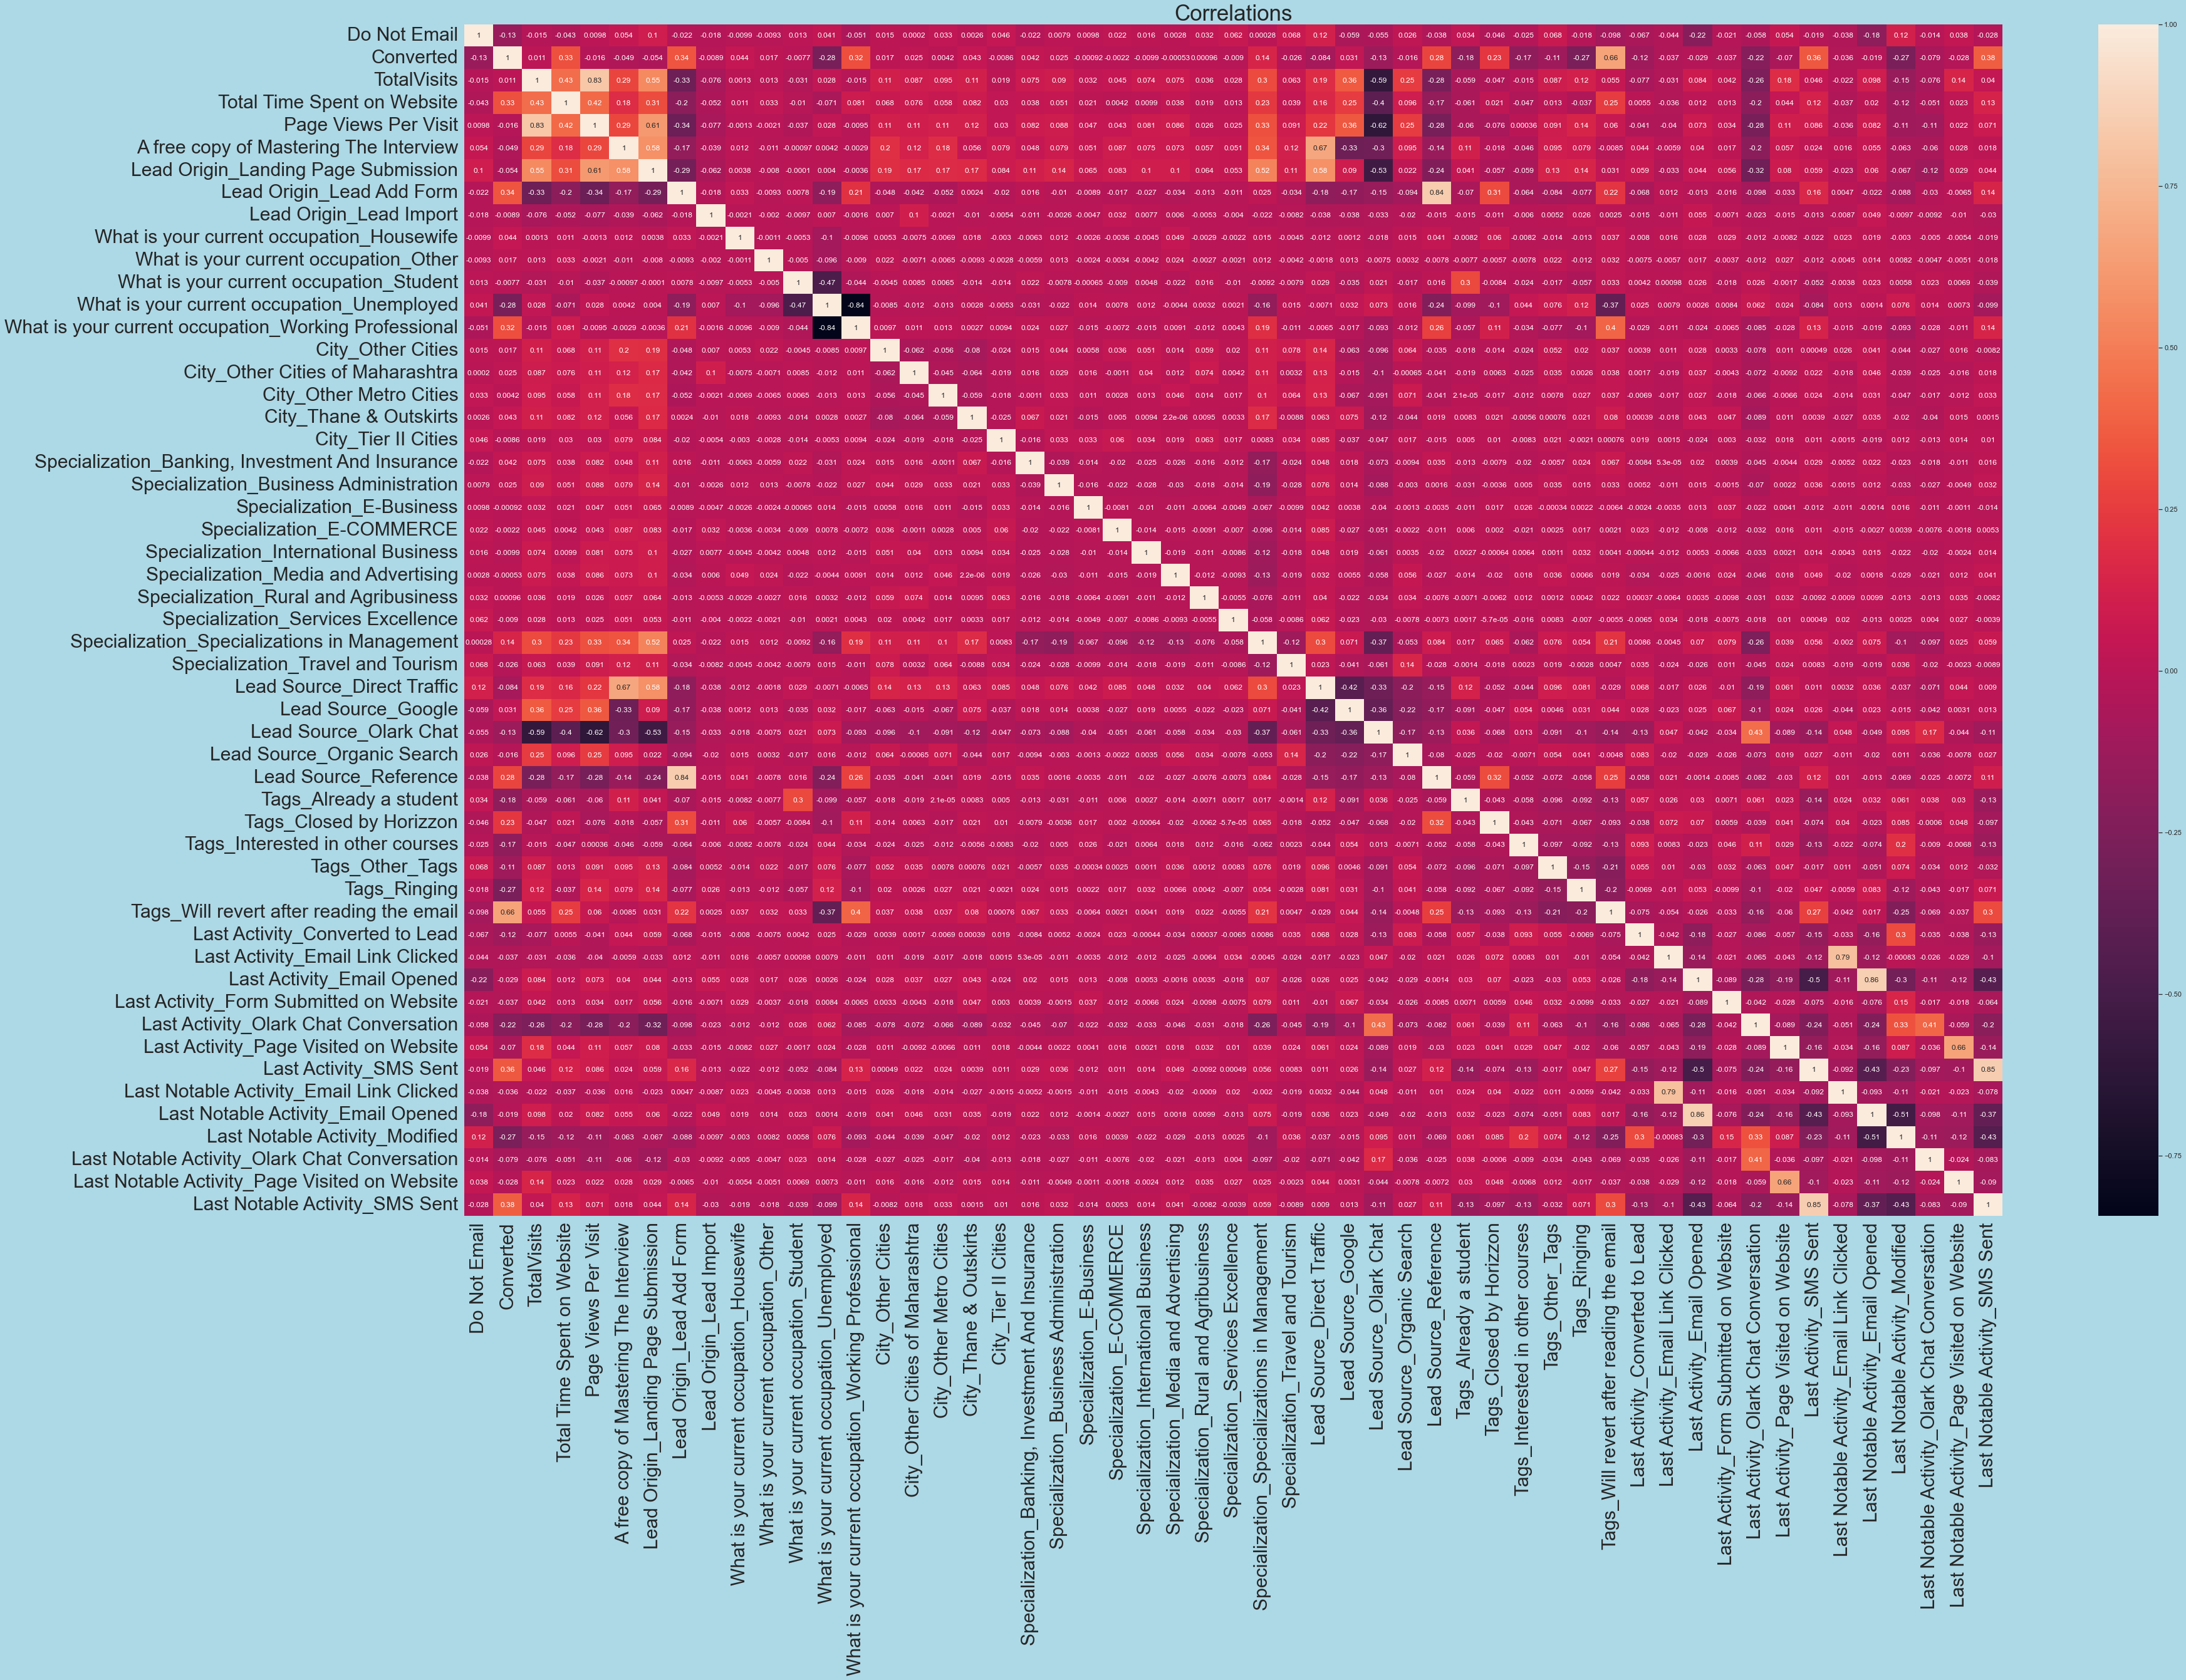

In [99]:
# corelation
plt.figure(figsize=(55,35))

sns.heatmap(df.corr(),annot = True)
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

##  Model Building

In [100]:
import statsmodels.api as sm

## Feature Selection Using RFE

In [101]:
# Importing RFE and logistic regression libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# creating an object

loreg = LogisticRegression()  

In [102]:
rfe = RFE(loreg,15)
rfe = rfe.fit(x_train,y_train)

In [103]:
#selected columns will have true 
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('What is your current occupation_Housewife', False, 22),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 37),
 ('What is your current occupation_Unemployed', False, 30),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 32),
 ('City_Other Cities of Maharashtra', False, 25),
 ('City_Other Metro Cities', False, 10),
 ('City_Thane & Outskirts', False, 20),
 ('City_Tier II Cities', False, 35),
 ('Specialization_Banking, Investment And Insurance', False, 11),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 38),
 ('S

In [104]:

rfe_col = x_train.columns[rfe.support_]

# listing features 'removed' by RFE feature selection
x_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [105]:
x_train_rfe = x_train[rfe_col]
x_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
7448,0,0.953545,0,1,1,0,0,0,0,0,0,0,1,0,1
6117,0,-0.723219,0,0,1,0,0,0,0,0,0,0,1,0,1
1153,0,-0.842575,0,0,0,0,0,0,0,0,0,0,0,0,0
3097,0,0.125751,0,1,1,0,0,0,0,0,0,0,1,0,1
4613,0,1.359741,1,1,0,0,0,1,0,1,0,0,0,0,0


#MODEL-1

In [106]:
# Adding a constant
x_train_1=sm.add_constant(x_train_rfe) 

# creating a model and fitting it.

logreg1=sm.GLM(y_train,x_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logreg1.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5470
Model:                            GLM   Df Residuals:                     5454
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.5
Date:                Tue, 14 Jun 2022   Deviance:                       2499.1
Time:                        14:01:46   Pearson chi2:                 7.68e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5391      0.114     -4.738      0.000      -0.762      -0.316
Do Not Email                                            -1.3597      0.233     -5.838      0.000      -1.816      -0.903
Total Time Spent on Website                              1.1123      0.061     18.354      0.000       0.994       1.231
Lead Origin_Lead Add Form                                4.2790      0.547      7.827      0.000       3.207       5.350
What is your current occupation_Working Professional     1.0681      0.370      2.889      0.004       0.343       1.793
Lead Source_Direct Traffic                              -1.6256      0.165     -9.863      0.000      -1.949      -1.303
Lead Source_Google                                      -1.3492      0.155     -8.686      0.000      -1.654      -1.045
Lead Source_Organic Search                              -1.7560      0.220     -7.996      0.000      -2.186      -1.326
Lead Source_Reference                                   -3.1739      0.682     -4.653      0.000      -4.511      -1.837
Tags_Already a student                                  -3.4079      0.731     -4.662      0.000      -4.841      -1.975
Tags_Closed by Horizzon                                  6.0669      1.018      5.959      0.000       4.072       8.062
Tags_Interested in other courses                        -2.4786      0.428     -5.791      0.000      -3.318      -1.640
Tags_Ringing                                            -3.5974      0.275    -13.097      0.000      -4.136      -3.059
Tags_Will revert after reading the email                 4.1465      0.193     21.489      0.000       3.768       4.525
Last Activity_Olark Chat Conversation                   -1.4456      0.216     -6.682      0.000      -1.870      -1.022
Last Notable Activity_SMS Sent                           2.0981      0.125     16.732      0.000       1.852       2.344
========================================================================================================================
"""

In [107]:
#calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=x_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(x_train_rfe[rfe_col].values,i) for i in range(x_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
7,Lead Source_Reference,3.73
2,Lead Origin_Lead Add Form,3.72
12,Tags_Will revert after reading the email,1.96
14,Last Notable Activity_SMS Sent,1.52
4,Lead Source_Direct Traffic,1.51
5,Lead Source_Google,1.50
3,What is your current occupation_Working Profes...,1.35
11,Tags_Ringing,1.32
1,Total Time Spent on Website,1.31
9,Tags_Closed by Horizzon,1.25


Satisfied with model no 1


In [108]:
# checking all the coefficients
logreg1.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                 6.066858
Lead Origin_Lead Add Form                               4.278953
Tags_Will revert after reading the email                4.146513
Last Notable Activity_SMS Sent                          2.098084
Total Time Spent on Website                             1.112282
What is your current occupation_Working Professional    1.068061
const                                                  -0.539105
Lead Source_Google                                     -1.349208
Do Not Email                                           -1.359653
Last Activity_Olark Chat Conversation                  -1.445589
Lead Source_Direct Traffic                             -1.625563
Lead Source_Organic Search                             -1.755966
Tags_Interested in other courses                       -2.478624
Lead Source_Reference                                  -3.173851
Tags_Already a student                                 -3.407906
Tags_Ringing             

vif-values < 4 and p-values < 0.050

In [109]:
y_train_pred=logreg1.predict(x_train_1)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
7448,1,0.997992,7448
6117,1,0.963579,6117
1153,0,0.185989,1153
3097,1,0.994973,3097
4613,1,0.999900,4613



ROC Curve Plotting

ROC curve shows the trade off between True postive rate and False positive 

rate - means if sensitivity increases specificity will decrease.

The curve closer to the left side border then right side of the border is more accurate.

The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [110]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
   
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    

    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None  

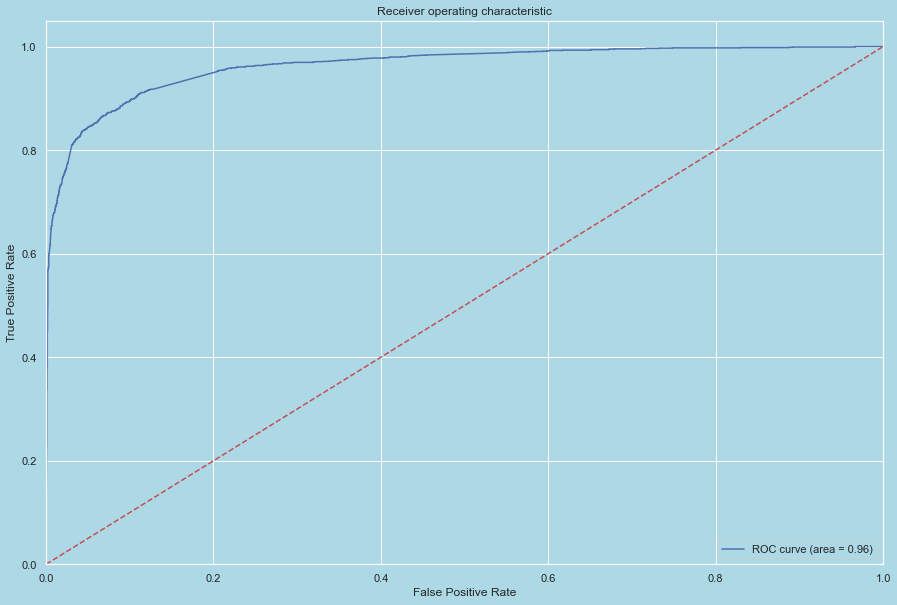

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [112]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7448,1,0.997992,7448,1,1,1,1,1,1,1,1,1,1
6117,1,0.963579,6117,1,1,1,1,1,1,1,1,1,1
1153,0,0.185989,1153,1,1,0,0,0,0,0,0,0,0
3097,1,0.994973,3097,1,1,1,1,1,1,1,1,1,1
4613,1,0.999900,4613,1,1,1,1,1,1,1,1,1,1


ACCURACY , SENSITIVITY, SPECIFICITY

In [113]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.370932    1.000000     0.000000
0.1          0.1  0.816636    0.966486     0.728277
0.2          0.2  0.891773    0.915722     0.877652
0.3          0.3  0.899634    0.891079     0.904679
0.4          0.4  0.907861    0.862001     0.934903
0.5          0.5  0.911700    0.837851     0.955246
0.6          0.6  0.910420    0.816166     0.965998
0.7          0.7  0.896709    0.761459     0.976460
0.8          0.8  0.888300    0.726466     0.983726
0.9          0.9  0.872395    0.669788     0.991863


plotting accuracy , sensitivity , specificity


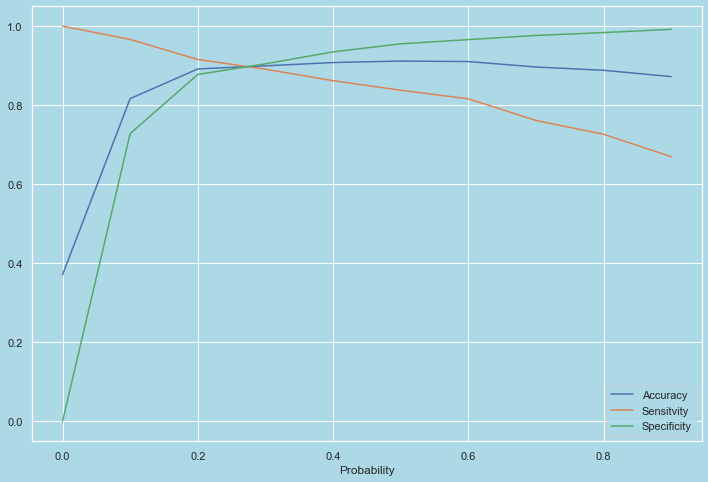

In [114]:
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))

# line plotting
plt.show()

0.275 looks good

In [115]:
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
7448,1,0.997992,7448,1,1,1,1,1,1,1,1,1,1,1
6117,1,0.963579,6117,1,1,1,1,1,1,1,1,1,1,1
1153,0,0.185989,1153,1,1,0,0,0,0,0,0,0,0,0
3097,1,0.994973,3097,1,1,1,1,1,1,1,1,1,1,1
4613,1,0.999900,4613,1,1,1,1,1,1,1,1,1,1,1


confusion matrix

In [116]:
confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[3113,  328],
       [ 221, 1808]], dtype=int64)

In [117]:
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity-',Sensitivity_train)  
print('Specificity-',Specificity_train) 

Sensitivity- 89.11
Specificity- 90.47


In [118]:

Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision-',Precision_train) 
print('Recall-',Recall_train)  

Precision- 84.64
Recall- 89.11


In [119]:
# Checking accuracy for train dataset 
from sklearn import metrics

Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy-',Accuracy_train)

Train set Accuracy- 89.96


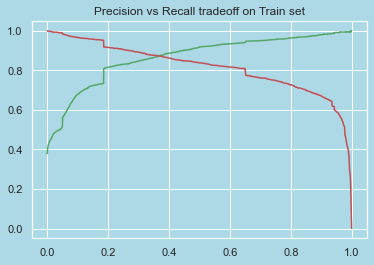

In [120]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

prediction on  the test data set

In [121]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [122]:
test_cols=x_train_1.columns[1:]              # Taking the same column train set has
x_test_final=x_test[test_cols]               # Updating it in the final test set
x_test_final=sm.add_constant(x_test_final)   # Adding constant to the final set set
y_pred_test=logreg1.predict(x_test_final)  

In [123]:
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()

,Converted,Converted_Probability,ID
3788,0,0.443704,3788
5953,1,0.650627,5953
9202,0,0.785895,9202
2832,0,0.132990,2832
4431,0,0.002588,4431


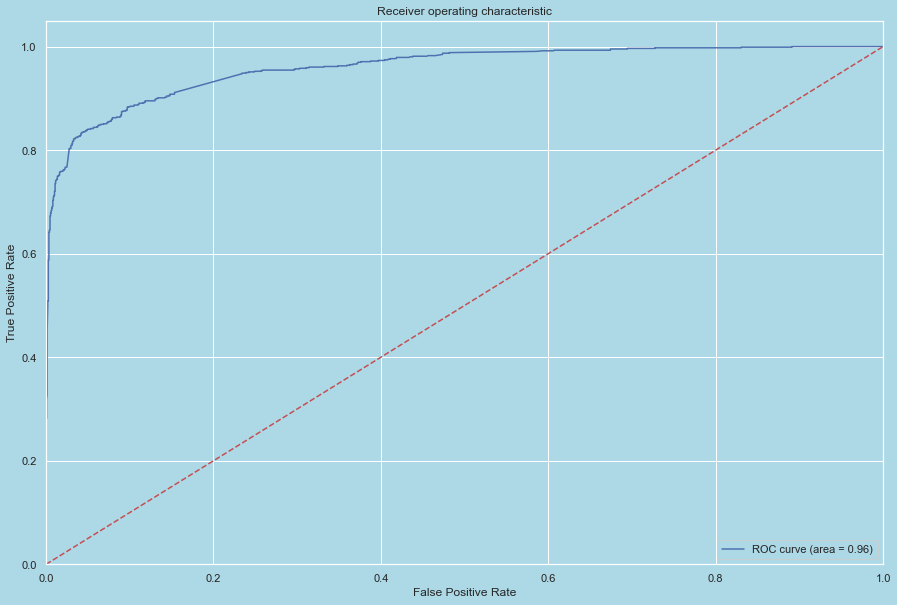

In [124]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

MODEL EVALUATION

In [125]:
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
3788,0,0.443704,3788,1
5953,1,0.650627,5953,1
9202,0,0.785895,9202,1
2832,0,0.132990,2832,0
4431,0,0.002588,4431,0


In [126]:
confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1313,  173],
       [  93,  766]], dtype=int64)

In [127]:
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity-',Sensitivity_test)   
print('Specificity-',Specificity_test) 

Sensitivity- 89.17
Specificity- 88.36


In [128]:
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision-',Precision_test) 
print('Recall-',Recall_test)   

Precision- 81.58
Recall- 89.17


In [129]:
Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy-',Accuracy_test)

Test set Accuracy- 88.66


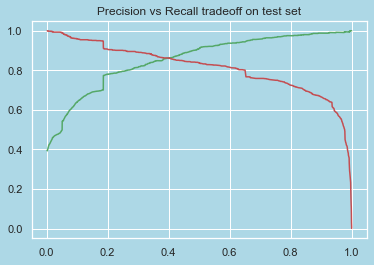

In [130]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [131]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  85.20578420467186


In [132]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 89.11
Specificity: 90.47
Precision: 84.64
Recall: 89.11
Accuracy: 89.96

Test Data Set metrics:

Sensitivity: 89.17
Specificity: 88.36
Precision: 81.58
Recall: 89.17
Accuracy: 88.66


In [133]:
y_test_pred_final.reset_index()

,index,Converted,Converted_Probability,ID,Predicted
0,3788,0,0.443704,3788,1
1,5953,1,0.650627,5953,1
2,9202,0,0.785895,9202,1
3,2832,0,0.132990,2832,0
4,4431,0,0.002588,4431,0
...,...,...,...,...,...
2340,1714,1,0.992095,1714,1
2341,7852,1,0.650627,7852,1
2342,2253,0,0.002367,2253,0
2343,3184,0,0.091750,3184,0


In [134]:
#Assigning a Lead Score to the Predicted values based on Lead Number

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

In [136]:
y_test_pred_final

,Converted,Converted_Probability,ID,Predicted,Lead Score
3788,0,0.443704,3788,1,44
5953,1,0.650627,5953,1,65
9202,0,0.785895,9202,1,79
2832,0,0.132990,2832,0,13
4431,0,0.002588,4431,0,0
...,...,...,...,...,...
1714,1,0.992095,1714,1,99
7852,1,0.650627,7852,1,65
2253,0,0.002367,2253,0,0
3184,0,0.091750,3184,0,9


In [135]:
y_test_pred_final.sort_values('Lead Score',ascending=False)

,Converted,Converted_Probability,ID,Predicted,Lead Score
4843,1,0.999546,4843,1,100
5372,1,0.999177,5372,1,100
7496,1,0.999568,7496,1,100
6384,1,0.997089,6384,1,100
739,1,0.999475,739,1,100
...,...,...,...,...,...
4848,0,0.002583,4848,0,0
332,0,0.004494,332,0,0
7269,0,0.002206,7269,0,0
2772,0,0.002080,2772,0,0


<b>Train Data Set metrics:Test Data Set metrics</b>

Sensitivity: 89.11 vs Sensitivity: 89.17<br>  
Specificity: 90.47 vs Specificity: 88.36<br>
Precision: 84.64 vs Precision: 83.95<br>  
Recall: 89.11 vs Recall: 89.17<br>
Accuracy: 89.96 vs Accuracy: 88.66



<b>Parameters:</b><br>
Tags_Closed by Horizzon                                 6.066858<br>
Lead Origin_Lead Add Form                               4.278953<br>
Tags_Will revert after reading the email                4.146513<br>
Last Notable Activity_SMS Sent                          2.098084<br>
Total Time Spent on Website                             1.112282<br>
What is your current occupation_Working Professional    1.068061<br>
Lead Source_Google                                     -1.349208<br>
Do Not Email                                           -1.359653<br>
Last Activity_Olark Chat Conversation                  -1.445589<br>
Lead Source_Direct Traffic                             -1.625563<br>
Lead Source_Organic Search                             -1.755966<br>
Tags_Interested in other courses                       -2.478624<br>
Lead Source_Reference                                  -3.173851<br>
Tags_Already a student                                 -3.407906<br>
Tags_Ringing                                           -3.597406<br>

#### Training Model Accuracy: 89.96 vs  Test Model Accuracy: 88.66